In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

C:\Users\futaba\AppData\Local\Temp\ipykernel_41552\714607030.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
with open('../transaction-to-pandas/transactions.df.list.pkl', 'rb') as f:
    df_list = pickle.load(f)

In [3]:
tx_size, count = np.unique([len(df.index) for df in df_list], return_counts=True)

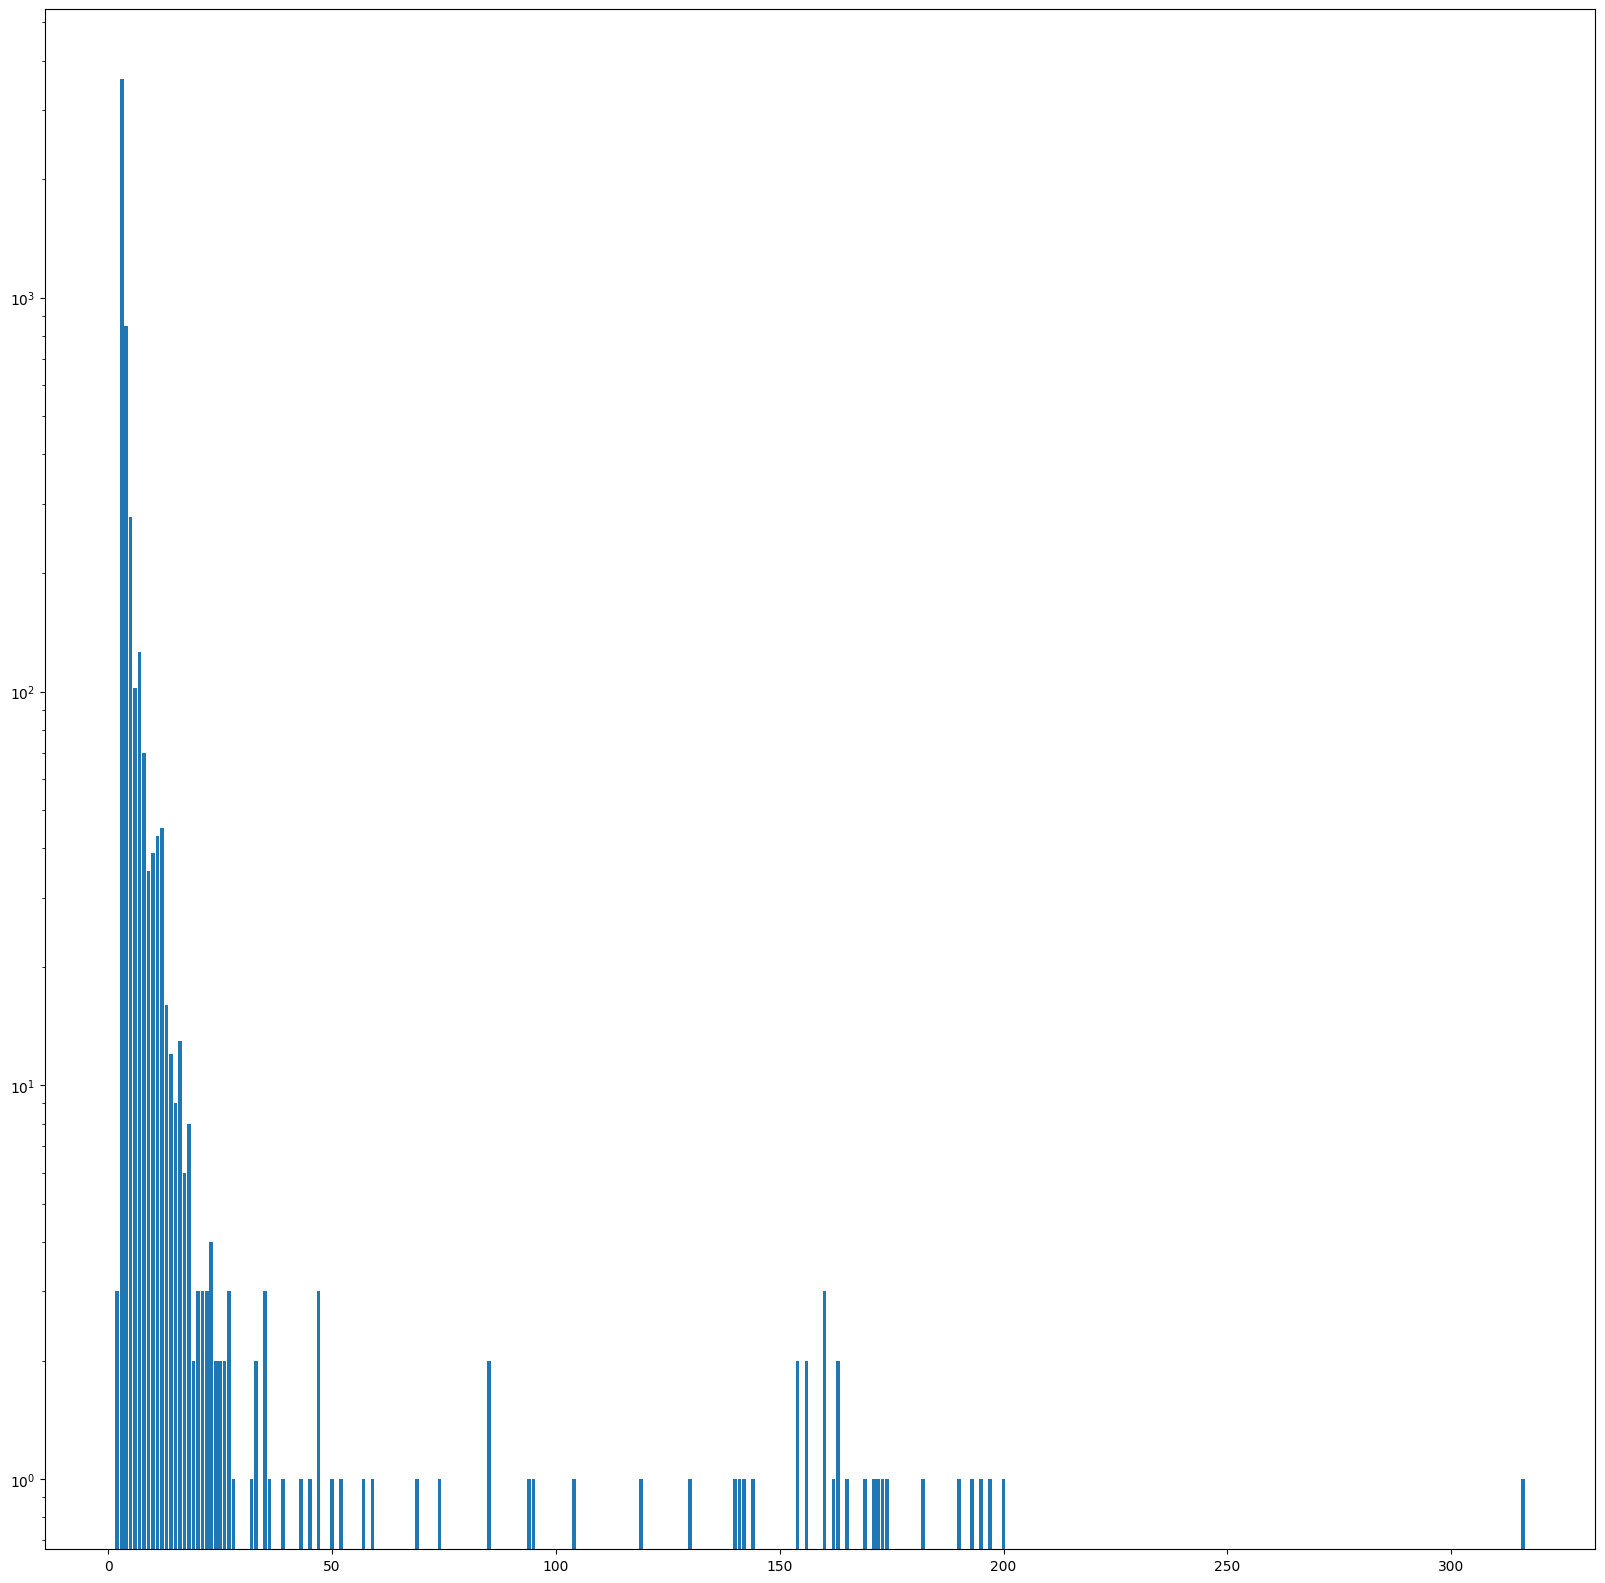

In [4]:
plt.figure(figsize=(20, 20))
plt.bar(tx_size, count)
plt.yscale('log')
plt.show()

In [5]:
for s, c in zip(tx_size, count):
    print(f'transaction size {s} has {c} count')

transaction size 2 has 3 count
transaction size 3 has 3586 count
transaction size 4 has 850 count
transaction size 5 has 277 count
transaction size 6 has 102 count
transaction size 7 has 126 count
transaction size 8 has 70 count
transaction size 9 has 35 count
transaction size 10 has 39 count
transaction size 11 has 43 count
transaction size 12 has 45 count
transaction size 13 has 16 count
transaction size 14 has 12 count
transaction size 15 has 9 count
transaction size 16 has 13 count
transaction size 17 has 6 count
transaction size 18 has 8 count
transaction size 19 has 2 count
transaction size 20 has 3 count
transaction size 21 has 3 count
transaction size 22 has 3 count
transaction size 23 has 4 count
transaction size 24 has 2 count
transaction size 25 has 2 count
transaction size 26 has 2 count
transaction size 27 has 3 count
transaction size 28 has 1 count
transaction size 32 has 1 count
transaction size 33 has 2 count
transaction size 35 has 3 count
transaction size 36 has 1 cou

In [6]:
effective_transactions = [c for c in count[0:18]]

In [7]:
sum(effective_transactions) / sum(count) # We will use 2 to 18 transaction size; covering 98.5% of our dataset

0.985708913125235

In [8]:
cleaned_df_list = []
for df in df_list:
    if len(df.index) > 18:
        continue
    if max(df['index']) > 30:
        continue    
    cleaned_df_list.append(df)
df_list = cleaned_df_list.copy()
del cleaned_df_list

In [9]:
len(df_list)

4999

In [10]:
max([len(df.index) for df in df_list])

18

we will increase the index of the outputs to differentiate between padded indexes and 

In [11]:
for df in df_list:
    df['index'] = df['index'] + 1

In [12]:
df

,output,txid,version,size,vsize,weight,locktime,index,value,address_type,is_change
0,True,c5baa5c93341f41ea1d5f97c3c9078e908291bf8ee52e0...,1,521,521,2084,0,1,0.211461,1,False
1,True,c5baa5c93341f41ea1d5f97c3c9078e908291bf8ee52e0...,1,521,521,2084,0,2,0.000901,1,True
2,False,aefdb94b5a7a73fea7ad9c925542ebab549de576e949f6...,1,226,226,904,0,2,0.201762,1,False
3,False,716b95670d9e1254f4585ea276207ee730a52242ece4cb...,1,225,225,900,0,1,0.009700,1,False
4,False,9c537ce4998763dc626eaef32d11fee6c0ac419c73c777...,1,226,226,904,0,1,0.001000,1,False


In [13]:
f'minimum size is {min([len(df.index) for df in df_list])}, and maximum size is {max([len(df.index) for df in df_list])}'

'minimum size is 2, and maximum size is 18'

we will train the one hot encoders and minmaxscalres

In [14]:
combined_df = pd.concat(df_list, ignore_index=True)

In [15]:
version_encoder = OneHotEncoder()
version_encoder.fit(np.array(combined_df['version']).reshape(-1,1))

address_type_encoder = OneHotEncoder()
address_type_encoder.fit(np.array(combined_df['address_type']).reshape(-1,1))

index_encoder = OneHotEncoder()
index_encoder.fit(np.array(combined_df['index']).reshape(-1,1))


OneHotEncoder()

In [16]:
columns_to_log_transform = ['size', 'vsize', 'weight', 'locktime', 'value']
combined_df[columns_to_log_transform] = np.log1p(combined_df[columns_to_log_transform])

In [17]:
size_encoder = MinMaxScaler(feature_range=(0, 1))
size_encoder.fit(np.array(combined_df['size']).reshape(-1,1))

vsize_encoder = MinMaxScaler(feature_range=(0, 1))
vsize_encoder.fit(np.array(combined_df['vsize']).reshape(-1,1))

weight_encoder = MinMaxScaler(feature_range=(0, 1))
weight_encoder.fit(np.array(combined_df['weight']).reshape(-1,1))

locktime_encoder = MinMaxScaler(feature_range=(0, 1))
locktime_encoder.fit(np.array(combined_df['locktime']).reshape(-1,1))

value_encoder = MinMaxScaler(feature_range=(0, 1))
value_encoder.fit(np.array(combined_df['value']).reshape(-1,1))

MinMaxScaler()

In [18]:
version_columns = []
for i in range (len(version_encoder.transform(np.array(combined_df['version']).reshape(-1,1)).toarray()[0])):
    version_columns.append(f'version_{i}')
    
addr_type_columns = []
for i in range (len(address_type_encoder.transform(np.array(combined_df['address_type']).reshape(-1,1)).toarray()[0])):
    addr_type_columns.append(f'address_type_{i}')
    
    
index_columns = []
for i in range (len(index_encoder.transform(np.array(combined_df['index']).reshape(-1,1)).toarray()[0])):
    index_columns.append(f'index_{i}')

In [19]:
max_txid = 17

In [20]:
prepared_dfs = []
for df in df_list:
    df[columns_to_log_transform] = np.log1p(df[columns_to_log_transform])
    
    txid_encoder = OneHotEncoder()
    txid_encoder.fit(np.array(df['txid']).reshape(-1,1))
    
    txid_columns = []
    for i in range (max_txid):
        txid_columns.append(f'txid_{i}')
    
    txid_column = txid_encoder.transform(np.array(df['txid']).reshape(-1,1)).toarray()
    padded_txid_column = []
    for i in range(len(txid_column)):
        pad = (max_txid - len(txid_column[i]))
        padded_txid_column.append(np.pad(txid_column[i], (0, pad), 'constant'))
    txid_column = np.array(padded_txid_column)
    del padded_txid_column
    
    txid_encoded = pd.DataFrame(txid_column, columns=txid_columns)
    version_encoded = pd.DataFrame((version_encoder.transform(np.array(df['version']).reshape(-1, 1)).toarray()), columns=version_columns)
    addr_type_encoded = pd.DataFrame((address_type_encoder.transform(np.array(df['address_type']).reshape(-1, 1)).toarray()), columns=addr_type_columns)
    index_encoded = pd.DataFrame((index_encoder.transform(np.array(df['index']).reshape(-1,1))).toarray(), columns=index_columns)
    size_encoded = pd.DataFrame((size_encoder.transform(np.array(df['size']).reshape(-1,1))), columns=['size'])
    vsize_encoded = pd.DataFrame((vsize_encoder.transform(np.array(df['vsize']).reshape(-1,1))), columns=['vsize'])
    weight_encoded = pd.DataFrame((weight_encoder.transform(np.array(df['weight']).reshape(-1,1))), columns=['weight'])
    locktime_encoded = pd.DataFrame((locktime_encoder.transform(np.array(df['locktime']).reshape(-1,1))), columns=['locktime'])
    value_encoded = pd.DataFrame((value_encoder.transform(np.array(df['value']).reshape(-1,1))), columns=['value'])
    change = pd.DataFrame(df['is_change']).reset_index(drop=True)
    concated_df = pd.concat([txid_encoded, version_encoded, addr_type_encoded, index_encoded, size_encoded, vsize_encoded, weight_encoded, locktime_encoded, value_encoded, change], axis=1)
    prepared_dfs.append(concated_df)

In [21]:
prepared_dfs[0]

,txid_0,txid_1,txid_2,txid_3,txid_4,txid_5,txid_6,txid_7,txid_8,txid_9,...,index_27,index_28,index_29,index_30,size,vsize,weight,locktime,value,is_change
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.178413,0.178413,0.178734,0.0,0.137705,False
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.178413,0.178413,0.178734,0.0,0.218103,True
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.031458,0.031458,0.031550,0.0,0.030074,False
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.546010,0.546010,0.546298,0.0,0.116745,False
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.031458,0.031458,0.031550,0.0,0.222402,False


In [24]:
with open('version_encoder.pkl', 'wb') as f:
    pickle.dump(version_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('address_type_encoder.pkl', 'wb') as f:
    pickle.dump(address_type_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('index_encoder.pkl', 'wb') as f:
    pickle.dump(index_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('size_encoder.pkl', 'wb') as f:
    pickle.dump(size_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('weight_encoder.pkl', 'wb') as f:
    pickle.dump(weight_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('vsize_encoder.pkl', 'wb') as f:
    pickle.dump(version_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('locktime_encoder.pkl', 'wb') as f:
    pickle.dump(locktime_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('value_encoder.pkl', 'wb') as f:
    pickle.dump(value_encoder, f, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
with open('prepared_transactions.df.list.pkl', 'wb') as f:
    pickle.dump(prepared_dfs, f, pickle.HIGHEST_PROTOCOL)